# Tweets Sentiment Analysis - Data Science approach

by Douglas Silva

- <a href="https://www.linkedin.com/in/douglas-hebert-e-silva-0a508784/"> Linkedin</a>
- <a href="https://github.com/vaziozio"> Github</a>

### Objective

- Preprocess, implement, understand, evaluate and select a model to feed our Tweets Streaming App.

### Datasets

- <a href="https://www.kaggle.com/augustop/portuguese-tweets-for-sentiment-analysis">Portuguese Tweets for Sentiment Analysis</a>

### Libraries

- <a href="https://docs.python.org/2/library/pickle.html#module-pickle">Pickle</a>
- <a href="https://scikit-learn.org/stable/">scikit-learn</a>
- <a href="https://www.nltk.org/">nltk</a>
- <a href="https://pandas.pydata.org/">Pandas</a>
- <a href="https://matplotlib.org/">Matplotlib</a>



## Implementing Model using SKLearn

### Importing libraries

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Loading train and test data

In [2]:
#loading and sampling train data
df_train = pd.read_csv('data/Train3Classes.csv', delimiter=';')
print('Train data rows: {}'.format(df_train.shape[0]))
df_train.sample(3)

Train data rows: 100000


,id,tweet_text,tweet_date,sentiment,query_used
86211,"1,0378E+18",Imprensa internacional repercute facada em Jai...,Thu Sep 06 20:39:06 +0000 2018,Neutro,jornaloglobo
52328,"1,04693E+18",Como me aguita este pedo :(,Tue Oct 02 01:20:06 +0000 2018,Negativo,:(
61238,"1,04671E+18",@elfawolga é alérgica a que? eu sou alérgica a...,Mon Oct 01 10:28:49 +0000 2018,Negativo,:(


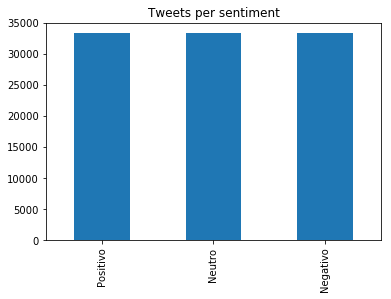

In [3]:
#visualizing categories from train data
df_train['sentiment'].value_counts().plot(kind='bar', title="Tweets per sentiment").xlabel=("Sentiment Classes")

In [4]:
#loading and sampling test data
df_test = pd.read_csv('data/Test3classes.csv', delimiter=';')
print('Test data rows: {}'.format(df_test.shape[0]))
df_test.sample(3)

Test data rows: 4999


,id,tweet_text,tweet_date,sentiment,query_used
2421,"1,0305E+18",Tô com saudade dos meus amiguinhos de Brasília :(,Fri Aug 17 17:19:19 +0000 2018,Negativo,:(
2112,"1,0305E+18","Sonhei com o chabelo hoje, que saudades daquel...",Fri Aug 17 17:04:38 +0000 2018,Negativo,:(
1623,"1,02957E+18",Vamos troca uma idéia bb :) https://t.co/moSM2...,Wed Aug 15 03:45:07 +0000 2018,Positivo,:)


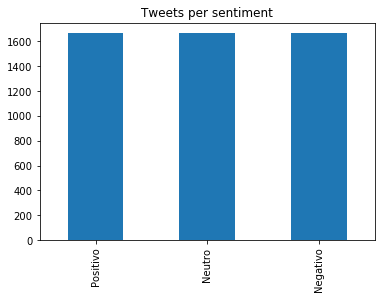

In [5]:
df_test['sentiment'].value_counts().plot(kind='bar', title="Tweets per sentiment").xlabel=("Sentiment Classes")

In [6]:
print('Number of rows in the total set: {}'.format(df_train.shape[0]+df_test.shape[0]))

Number of rows in the total set: 104999


#### Selecting features and labels for both datasets 

In [7]:
#train data
tweets, sentiments = df_train['tweet_text'].values , df_train['sentiment'].values
#test data
tweets_ts, sentiments_ts = df_test['tweet_text'].values , df_test['sentiment'].values
tweets[54]

'Hoje ta parecendo sabado to perdida :)'

### Applying Bag of Words

In [8]:
# Instantiating the CountVectorizer method
count_vector = CountVectorizer()

# Fitting the training data and then return the matrix
training_data = count_vector.fit_transform(tweets)

# Transform testing data and return the matrix.
testing_data = count_vector.transform(tweets_ts)

### Naive Bayes Implementation with scikit-learn

In [9]:
#creating and fitting NB classifier to our data
clf = MultinomialNB()
clf.fit(training_data , sentiments)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

#### Predicting

In [10]:
#predicting
predictions = clf.predict(testing_data)

### Evaluating Model - Methods

- **Accuracy**: Measures how often the classifier makes the correct prediction. It's the ratio of the number of correct predictions to the total number os predictions.

- **Precision**: Tells us what proportion of tweets we classified as in a sentiment class, really were in this class. It's a ratio of True Positive to All positives -> [True Positives/(True Positives + False Positives)]

- **Recall**: Tells us what proportion of tweets that actually were in a class, were correctly classified by us, in other words it is the ratio of -> [True Positives/(True Positives + False Negatives)]

For classification problems that are skewed in their classification distributions(not our case), for example if we had 100 tweets, only 3 'Negative' and the rest 97 weren't, accuracy by itself is not a very good metric. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score.

#### Evaluating the classifier

In [11]:
#implementing support metrics

print('Precision score: ', format(precision_score(sentiments_ts,predictions,average="macro")))
print('Recall score: ', format(recall_score(sentiments_ts,predictions,average="macro")))
print('F1 score: ', format(f1_score(sentiments_ts,predictions,average="macro")))

Precision score:  0.7905154107589398
Recall score:  0.795186100835055
F1 score:  0.7915624812187664


# Accuracy report

In [12]:
#implementing accuracy

print('Accuracy score: ', format(accuracy_score(sentiments_ts,predictions)))

Accuracy score:  0.7951590318063613


#### What metric are you using? Why ?

I am using Accuracy metric, once our dataset is balanced and not skewed, we can take accuracy as a good metric.

#### Which type of test did you choose ?

I choose test/split test method.

#### Include the test dataset

The entire data is attached to this project in 'data' folder

### Saving model to deploy

In [13]:
#saving model to pickle
filename = 'sentiment_analysis.sav'
pickle.dump(clf, open(filename, 'wb'), protocol=2)
filename = 'vectorizer.sav'
pickle.dump(count_vector, open(filename, 'wb'), protocol=2)